In [1]:
from Training_utils.buildModel import BuildModel
from transformers import AutoTokenizer
import torch
import re
import time
model_config = {
        "D_Model": 420,
        "Num_Heads": 6,
        "Num_Layers": 6,
        "Dropout": 0.001,
        "Vocab_size": 32105,
        "FeedForward_size": 2000,
        "Context_size": 80
    }
tokenizer_path = '../Full Pipeline(LLM)/Saved_tokenizer/t5_Tokinzer'
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path,use_fast=True)
def clean_text(text):
    text = text.lower()

    tokens = re.findall(r"\w+(?:'\w+)*|[^\w\s]", text)
    
    tokens = " ".join(tokens)
    return tokens

model_path ="/home/gz/Documents/Final_version_SLM/Saved_Models/Full_trained_Model/80t_41m_b2_wo_pre.pth"
device = ('cuda' if torch.cuda.is_available() else 'cpu')
builder = BuildModel()
model = builder.createModel(model_config,Model_type='None')
model.to(device)

builder.load_weights(path=model_path)




GPTModel class defined.


/home/gz/Documents/Final_version_SLM/.llm_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


model weights has been loaded


In [60]:

def gen_text(prompt,model,tokenizer,max_tokens=80,pad_token=0,temperaure=0.0,top_k=0,device=device):
    prompt = clean_text(prompt)
    prompt = f"{tokenizer.bos_token} <user> {prompt} {tokenizer.eos_token} <bot> "
    tokenized_text = tokenizer(prompt,return_tensors='pt',add_special_tokens=False,return_attention_mask=False,padding=False,truncation=False,)
    input_ids = tokenized_text['input_ids']
    pad_index = tokenizer.pad_token
    generated_tokens = []
    input_ids = input_ids.to(device)
    model.eval()
   
    for _ in range(max_tokens):
        with torch.no_grad():
            logits = model(input_ids,pad_token=pad_token)
            logits = logits[:,-1,:]
           
           
            if temperaure > 0.0:
               logits= logits/temperaure
            
            if top_k != 0:
                top_logits,top_pos = torch.topk(logits,top_k)
                min_val = top_logits[:,-1]
               
                logits= torch.where(logits<min_val,
                                          torch.tensor(float('-inf'),device=device),
                                          logits
                                          ) 
                
            if top_k != 0 or temperaure > 0.0:
                probs = torch.softmax(logits,dim=-1)
                pred_index = torch.multinomial(probs,num_samples=1)
                pred_token = tokenizer.convert_ids_to_tokens(pred_index.tolist()[0])
                if pred_token[0] == '<end>':
                    break
                generated_tokens.append(pred_index.squeeze(0).tolist()[0])
            else:
                pred_index = torch.argmax(logits,dim=-1)
                pred_token = tokenizer.convert_ids_to_tokens(pred_index.tolist())
                if pred_token[0] == '<end>':
                    break
                generated_tokens.append(pred_index.tolist()[0])
                pred_index = pred_index.unsqueeze(0)
                

                
            
            

            
            
            
            
            input_ids = torch.cat([input_ids,pred_index],dim=-1)
    
    text = tokenizer.decode(generated_tokens)
    for word in text.split():
        print(word, end=" ", flush=True)  
        time.sleep(0.07)  
    

prompt = ' do you like watching sports ? '
gen_text(prompt,model,tokenizer,top_k=50,temperaure=0.50)

yes, i like watching football and basketball. 

In [ ]:

def gen_text(prompt,model,tokenizer,max_tokens=80,pad_token=0,device=device):
    prompt = clean_text(prompt)
    prompt = f"{tokenizer.bos_token} <user> {prompt} {tokenizer.eos_token} <bot> "
    tokenized_text = tokenizer(prompt,return_tensors='pt',add_special_tokens=False,return_attention_mask=False,padding=False,truncation=False,)
    input_ids = tokenized_text['input_ids']
    pad_index = tokenizer.pad_token
    generated_tokens = []
    input_ids = input_ids.to(device)
    model.eval()
   
    for _ in range(max_tokens):
        with torch.no_grad():
            logits = model(input_ids,pad_token=pad_token)
            logits = logits[:,-1,:]
            pred_index = torch.argmax(logits,dim=-1)
          
            pred_token = tokenizer.convert_ids_to_tokens(pred_index.tolist())
           

            if pred_token[0] == '<end>':
                break
            generated_tokens.append(pred_index.tolist()[0])

            input_ids = torch.cat([input_ids,pred_index.unsqueeze(0)],dim=-1)
    
    text = tokenizer.decode(generated_tokens)
    for word in text.split():
        print(word, end=" ", flush=True)  
        time.sleep(0.07)  
prompt = "i'm doing fine . thank you for asking ."
gen_text(prompt,model,tokenizer)

torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
i'm glad to hear that. 

In [ ]:
import torch
torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats()


In [ ]:
probs = torch.softmax(z,dim=-1)
probs

In [ ]:
top_logits,top_pos = torch.topk(z,3)
print(top_logits)
print(top_pos)

In [ ]:
next_logits = torch.where(condition= z < top_logits[-1],
                          input=torch.tensor(float('-inf')),
                          other=z
                          
                          
                          )

In [ ]:
next_logits

In [ ]:
probs = torch.softmax(next_logits,dim=-1)
probs

In [ ]:



for prob in probs.tolist():
    print(f"{prob:.6f}")  # 6 decimal places


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x = np.array([1,2,3,5])
y = np.array([6,7,8,9])


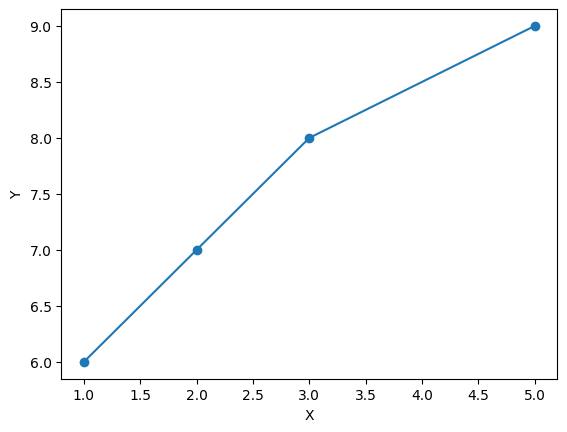

In [7]:
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,y,marker='o')